#Mount Google Drive, Define **Path**



In [ ]:
from google.colab import drive
import os
import sys
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define Path
path_records = '/content/drive/MyDrive/Github/Article/records'
# Set Path
path_wd = '/content/drive/MyDrive/Github/Article'
path_font = '/content/drive/MyDrive/Github/Article/fonts/STHUPO.TTF'
path_img = '/content/drive/MyDrive/Github/Article/img'
path_reg = '/content/drive/MyDrive/Github/Content/sources/ChinaFilm'
path_zgdypw = '/content/drive/MyDrive/Github/Content/sources/zgdypw'

os.chdir(path_wd)

# Install requirements and restart

In [ ]:
%%capture
!pip install pandas==1.3.2
!pip install transformers
# Install Requirements
!pip install -r /content/drive/MyDrive/Github/Content/sources/ChinaFilm/requirements.txt
!apt update
#!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# Import Libraries

In [3]:
# Import External Libs
import pandas as pd
import numpy as np
import datetime as dt
import re
import gc
import random

from IPython.display import display, HTML
import torch
from transformers import AdamW, BartForConditionalGeneration

from selenium import webdriver

import jieba.analyse
tfidf = jieba.analyse.extract_tags
textrank = jieba.analyse.textrank

import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.font_manager as fm

path_fonts = '/content/drive/MyDrive/Github/Article/fonts'
fontprop = fm.FontProperties(fname=path_fonts, size= 15)

font_dirs = [path_fonts, ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
#font_list = fm.createFontList(font_files)
for font in font_files:
  fm.fontManager.addfont(font)

plt.rcParams['figure.figsize'] = [15, 9]
mp.rcParams['font.family'] = ['Microsoft YaHei']

%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Load Libraries Local
path_Content = '/content/drive/MyDrive/Github/Content'
os.chdir(path_Content)

#%load_ext autoreload
%reload_ext autoreload

# ZGDYPW
os.chdir(path_Content + '/sources/zgdypw')
from zgdypw import ZGDYPW
zgd = ZGDYPW()

# Chromedriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=chrome_options)

# ChinaFilm
os.chdir(path_Content + '/sources/ChinaFilm')
from Record_Registration import Registration
dy_reg = Registration(driver)

os.chdir(path_wd)
from generate import utils

#Load Release and Registration Records

## Update Sources to latest

In [ ]:
# Update ChinaFilm Release Records
path_reg = '/content/drive/MyDrive/Github/Content/sources/ChinaFilm'
os.chdir(path_reg)
#!python Update_Release.py

In [ ]:
# Update ChinaFilm Reg Records
path_reg = '/content/drive/MyDrive/Github/Content/sources/ChinaFilm'
os.chdir(path_reg)
#!python Update_Registration.py

In [ ]:
# Update zgdypw Release Records
path_rel = '/content/drive/MyDrive/Github/Content/sources/zgdypw'
os.chdir(path_rel)
!python update.py

Traceback (most recent call last):
  File "update.py", line 14, in <module>
    from zgdypw import ZGDYPW
  File "/content/drive/MyDrive/Github/Content/sources/zgdypw/zgdypw.py", line 25, in <module>
    from utils import DB
ModuleNotFoundError: No module named 'utils'


## Import Records

In [ ]:
# Import zgdypow Releases
fp = path_rel + '/records/contents_of_releases.json'
df_rel = pd.read_json(fp)
df_rel = df_rel.sort_values('pubdate', ascending=False)
str_pubdate_latest = df_rel['pubdate'].iloc[0]

df_rel_curr = df_rel[df_rel['pubdate'] == str_pubdate_latest]
df_rel_curr.loc[:, 'pubdate'] = pd.to_datetime(df_rel_curr['pubdate'])
df_rel_curr.loc[:, '上映日期'] = pd.to_datetime(df_rel_curr['上映日期'])
df_rel_curr = df_rel_curr.sort_values('上映日期')
dt_pubdate_latest = df_rel_curr['pubdate'].iloc[0]

#del df_rel
gc.collect()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


9002

In [ ]:
dt_pubdate_latest

Timestamp('2021-11-01 00:00:00')

In [ ]:
# Import ChinaFilm Registrations
fp = '/content/drive/MyDrive/Github/Content/sources/ChinaFilm/records/contents_of_registrations.json'
df_reg = pd.read_json(fp, orient='record')
df_reg['匹配片名'] = df_reg['片名']

# Import ChinaFilm Releases
fp = '/content/drive/MyDrive/Github/Content/sources/ChinaFilm/records/contents_of_releases.json'
df_cf_releases = pd.read_json(fp)

In [ ]:
df_rel_curr.columns

Index(['电影名称', 'pubtitle', 'pubdate', 'publink', '上映日期', '导演', '主演', '国别/地区',
       'img_remote'],
      dtype='object')

In [ ]:
df_reg.columns

Index(['备案立项号', '片名', '备案单位', '编剧', '备案结果', '备案地', '梗概', '公示日期', '公示批次名称',
       '备案详细页链接', '公示批次链接', '电影类别', '匹配片名'],
      dtype='object')

In [ ]:
df_cf_releases.columns

Index(['序号', '电影类别', '编码', '公映证号', '片名', '第一出品单位', '公示批次链接', '公示名称', '公示日期'], dtype='object')

#Interactively Find matches

## Match and Merge REL

In [ ]:
# Match df_rel_curr to df_cf_releases
df_rel_curr['匹配片名'] = df_rel_curr['电影名称']
df_matched_rel = df_cf_releases[df_cf_releases['片名'].isin(df_rel_curr['电影名称'])]
df_matched_rel['电影名称'] = df_matched_rel['片名'].copy()
idx_no_match = df_rel_curr.loc[~df_rel_curr['电影名称'].isin(df_matched_rel['片名'])].index
df_rel_curr.loc[df_rel_curr.index.isin(idx_no_match), '匹配片名'] = None
#df_rel_curr.loc[df_rel_curr['匹配片名'].isna(), :]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_rel_curr.loc[(df_rel_curr['匹配片名'].isna()) & 
                (df_rel_curr['国别/地区'] == '中国'), '电影名称'].to_numpy()

array(['我的初恋⼗⼋岁', '扬名⽴万', '捞世界', '邓⼩平⼩道'], dtype=object)

In [ ]:
# RUN ONLY ONCE
found_reg = [None, None, None, None] 
df_rel_curr.loc[(df_rel_curr['匹配片名'].isna()) & 
                (df_rel_curr['国别/地区'] == '中国'), '匹配片名'] = found_reg

df_matched_rel = df_cf_releases[df_cf_releases['片名'].isin(df_rel_curr['匹配片名'])]
df_matched_rel.rename(columns={'片名':'匹配片名'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_rel_curr.columns

Index(['电影名称', 'pubtitle', 'pubdate', 'publink', '上映日期', '导演', '主演', '国别/地区',
       'img_remote', '匹配片名'],
      dtype='object')

In [ ]:
df_matched_rel.columns

Index(['序号', '电影类别', '编码', '公映证号', '匹配片名', '第一出品单位', '公示批次链接', '公示名称', '公示日期'], dtype='object')

In [ ]:
# Merge
df_rel_curr = df_rel_curr.merge(df_matched_rel, on='匹配片名', how='left')

In [ ]:
df_rel_curr

,电影名称,pubtitle,pubdate,publink,上映日期,导演,主演,国别/地区,img_remote,匹配片名,序号,电影类别,编码,公映证号,第一出品单位,公示批次链接,公示名称,公示日期
0,我的初恋⼗⼋岁,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2021-11-11,王择谚,林⾠涵、曹峻祥、翁虹,中国,https://www.zgdypw.cn/sc/scxx/202111/01/W02021...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,扬名⽴万,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2021-11-11,刘循⼦墨,尹正、邓家佳、喻恩泰,中国,https://www.zgdypw.cn/sc/scxx/202111/01/W02021...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,指引,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2021-11-11,苏纳⼭,孙佳、宋琦、陈安,中国,https://www.zgdypw.cn/sc/scxx/202111/01/W02021...,指引,40.0,国产故事片,1102272020,204,上海师焉文化传媒有限公司,http://www.chinafilm.gov.cn/chinafilm/contents...,2021年电影公映许可证发放公示（国产故事片第六批）,2021-07-13
3,八拍,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2021-11-12,钟康,许桦、余健波、申旭阔,中国,https://www.zgdypw.cn/sc/scxx/202111/01/W02021...,八拍,26.0,国产故事片,1101582020,135,泰然众合影业有限公司,http://www.chinafilm.gov.cn/chinafilm/contents...,2020年电影公映许可证发放公示（国产故事片第二批）,2020-09-02
4,捞世界,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2021-11-26,谢晓东,黄才伦、冯秦川、胡铂,中国,https://www.zgdypw.cn/sc/scxx/202111/01/W02021...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,邓⼩平⼩道,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2022-03-11,雷献⽲,卢奇、于慧、赵恒煊,中国,https://www.zgdypw.cn/sc/scxx/202111/01/W02021...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Match and Merge Rel Reg

In [ ]:
# Match df_rel_curr to df_reg
df_rel_curr['匹配片名'] = df_rel_curr['电影名称']
df_matched = \
  df_reg[df_reg['匹配片名'].isin(df_rel_curr['匹配片名'].to_numpy())]
idx_no_match = df_rel_curr.loc[~df_rel_curr['匹配片名'].isin(
    df_matched['片名'].to_numpy())].index
df_rel_curr.loc[df_rel_curr.index.isin(idx_no_match), '匹配片名'] = None
df_rel_curr.loc[(df_rel_curr['匹配片名'].isna()) & 
    (df_rel_curr['国别/地区'] == '中国'), 
    ['电影名称', 'pubtitle', 'pubdate', 'publink', '上映日期', '导演', '主演']]

,电影名称,pubtitle,pubdate,publink,上映日期,导演,主演
0,我的初恋⼗⼋岁,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2021-11-11,王择谚,林⾠涵、曹峻祥、翁虹
1,扬名⽴万,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2021-11-11,刘循⼦墨,尹正、邓家佳、喻恩泰
3,八拍,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2021-11-12,钟康,许桦、余健波、申旭阔
5,邓⼩平⼩道,新片上映预报,2021-11-01,https://www.zgdypw.cn/sc/scxx/202111/01/t20211...,2022-03-11,雷献⽲,卢奇、于慧、赵恒煊


In [ ]:
df_rel_curr.loc[(df_rel_curr['匹配片名'].isna()) & 
    (df_rel_curr['国别/地区'] == '中国'), '电影名称'].to_numpy()

array(['我的初恋⼗⼋岁', '扬名⽴万', '八拍', '邓⼩平⼩道'], dtype=object)

In [ ]:
# assign manually found titles to df_curr_releases
found_reg = ['我的初恋十八岁1', '一部佳作的诞生', '舞梦者', '邓小平小道']
df_rel_curr.loc[(df_rel_curr['匹配片名'].isna()) & 
    (df_rel_curr['国别/地区'] == '中国'), '匹配片名'] = found_reg

In [ ]:
# Merge
df_matched = df_reg.loc[df_reg['匹配片名'].isin(df_rel_curr['匹配片名'].to_numpy()),
                        ['匹配片名', '编剧', '梗概', '公示日期', 
                         '备案单位', '备案结果', '备案立项号']
                       ]
df_matched.rename(columns={'公示日期':'备案公示日期'}, inplace=True)
df = df_rel_curr.merge(df_matched, on='匹配片名', how='left')
df['备案公示日期'] = df['备案公示日期'].apply(
    lambda x: pd.to_datetime(x, infer_datetime_format=True))
df['备案至今'] = dt_pubdate_latest - df['备案公示日期']

##Remove Duplicates (if any)

In [ ]:
HTML(df.to_html())

In [ ]:
# RUN ONCE
idx_to_remove = []
df = df[~df.index.isin(idx_to_remove)].reset_index(drop=True)

In [ ]:
df

## Search for foreign film synopsis

In [ ]:
# Load Libraries Local
path_Baike = '/content/drive/MyDrive/Github/Content/sources/baike'
os.chdir(path_Baike)

#%load_ext autoreload
%reload_ext autoreload
from Baike import Baike
baike = Baike()

In [ ]:
baike.search_for_content('扬名⽴万')

'《扬名立万》是由韩寒监制，刘循子墨执导，陈思编剧，尹正、邓家佳、喻恩泰、杨皓宇、张本煜、柯达领衔主演，陈明昊、秦霄贤、邓恩熙、余皑磊特别出演的悬疑喜剧电影。该片讲述了一群电影人为将一起惊天大案拍成电影而齐聚一堂，创意层出不穷之时，却不曾想“凶手”也来到了现场的故事。该片于2021年11月11日在中国大陆上映。'

In [ ]:
synpo_007 = baike.search_for_content('007：无暇赴死')

In [ ]:
df.loc[df['电影名称'] == '入殓师', '梗概'] = synop_passing
df.loc[df['电影名称'] == '007：无暇赴死', '梗概'] = synpo_007

## SEARCH TOOLS

In [ ]:
df_cf_releases[df_cf_releases['片名'].str.contains('一部佳作的诞生')]

,序号,电影类别,编码,公映证号,片名,第一出品单位,公示批次链接,公示名称,公示日期


In [ ]:
df_reg.loc[df_reg['备案单位'].fillna('').str.contains('江西电影'), 
           ['片名', '备案立项号', '备案单位', '编剧', '梗概', '公示日期']][:50]

In [ ]:
df_reg.loc[df_reg['片名'].fillna('').str.contains('八拍')]#.loc[4268,'梗概']

,备案立项号,片名,备案单位,编剧,备案结果,备案地,梗概,公示日期,公示批次名称,备案详细页链接,公示批次链接,电影类别,匹配片名


In [ ]:
df_reg.loc[df_reg['编剧'].fillna('').str.contains('潘奕霖'), 
           ['片名', '备案单位', '编剧', '梗概', '备案立项号']] 

,片名,备案单位,编剧,梗概,备案立项号


In [ ]:
df_reg.loc[df_reg['梗概'].fillna('').str.contains('刘宪'), 
           ['片名', '备案单位', '编剧', '梗概', '备案立项号']] 

,片名,备案单位,编剧,梗概,备案立项号
10449,舞梦者,泰然众合影业有限公司,佟欣、钟康康,刘宪为了机会和梦想远走家乡，但生活用现实将刘宪梦想的火苗渐渐熄灭。几近绝望之时刘宪终于迎来了...,影剧备字[2018]第2870号


In [ ]:
df_reg.loc[df_reg['片名'].fillna('').str.contains('街舞爱好者'), 
           ['片名', '备案单位', '编剧', '梗概', '备案立项号']] 

In [ ]:
df_reg.loc[df_reg['电影类别'].fillna('').str.contains('纪录'), 
           ['片名', '备案单位', '编剧', '梗概', '备案立项号']] 

In [ ]:
df.shape

(16, 16)

In [ ]:
df['电影名称']

#Run Models for prediction

## Predict Genre

In [ ]:
# Define Labels
label2id_genre= {'传奇': 0, '传记': 1, '其它': 2, '军旅': 3, '农村': 4, '宫廷': 5,  
                  '武打': 6, '涉案': 7, '神话': 8, '科幻': 9, '都市': 10, '青少': 11,
                  '革命': 12}
id2label_genre = {}
for k, v in label2id_genre.items(): id2label_genre[v] = k

In [ ]:
%%capture
# Genre Classifier
N_LABELS = len(id2label_genre)
ID2LABEL = id2label_genre
LABEL2ID = label2id_genre

from transformers import BertTokenizer, BertForSequenceClassification
import torch
############
model_name = '/content/drive/MyDrive/Github/Content/tools/models/chinese-bert-wwm-classification-NRTAgenre'
############
if torch.cuda.device_count() > 0:
  device = 'cuda:' + str(torch.cuda.current_device())
else:
  device = 'cpu'

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(
  model_name,
  num_labels=N_LABELS,
  problem_type="multi_label_classification",
  id2label=ID2LABEL,
  label2id=LABEL2ID,  
).to(device)
model.eval() # set model to eval mode for faster prediction

In [ ]:
batch_size = 8
i = 0
ls = df['梗概'].fillna('').tolist()
softmax = torch.nn.Softmax(dim=-1)
L = df.shape[0]
test_predictions = []

while i < L:
  batch_test = tokenizer(ls[i:i+batch_size],
                           padding=True,
                           max_length=512, 
                           truncation=True, 
                           return_tensors='pt')
  batch_test.to(device)
  batch_outputs = model(**batch_test)
  batch_logtis = batch_outputs.logits
  batch_softmax = softmax(batch_logtis)
  batch_results = torch.argmax(batch_softmax, dim=1).cpu().numpy()
  test_predictions.extend(list(batch_results))
  i += batch_size

df['类型'] = test_predictions
df['类型'] = df['类型'].apply(lambda x: id2label_genre[x])

## Predict Time

In [ ]:
# Define Labels
label2id_time = {'古代': 0, '当代': 1, '现代': 2, '近代': 3}
id2label_time = {}
for k, v in label2id_time.items(): id2label_time[v] = k

In [ ]:
%%capture
# Time Classifier

N_LABELS = len(id2label_time)
ID2LABEL = id2label_time
LABEL2ID = label2id_time

from transformers import BertTokenizer, BertForSequenceClassification
import torch
############
model_name = '/content/drive/MyDrive/Github/Content/tools/models/chinese-bert-wwm-classification-NRTAtime'
############
if torch.cuda.device_count() > 0:
  device = 'cuda:' + str(torch.cuda.current_device())
else:
  device = 'cpu'

tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(
  model_name,
  num_labels=N_LABELS,
  problem_type="multi_label_classification",
  id2label=ID2LABEL,
  label2id=LABEL2ID,  
).to(device)
model.eval() # set model to eval mode for faster prediction

In [ ]:
batch_size = 8
i = 0
ls = df['梗概'].fillna('').tolist()
softmax = torch.nn.Softmax(dim=-1)
L = df.shape[0]
test_predictions = []

while i < L:
  batch_test = tokenizer(ls[i:i+batch_size],
                           padding=True,
                           max_length=512, 
                           truncation=True, 
                           return_tensors='pt')
  batch_test.to(device)
  batch_outputs = model(**batch_test)
  batch_logtis = batch_outputs.logits
  batch_softmax = softmax(batch_logtis)
  batch_results = torch.argmax(batch_softmax, dim=1).cpu().numpy()
  test_predictions.extend(list(batch_results))
  i += batch_size

df['年代'] = test_predictions
df['年代'] = df['年代'].apply(lambda x: id2label_time[x])

## Predict Title

In [ ]:
%%capture
from transformers import BertTokenizer, BartForConditionalGeneration

# assign device
if torch.cuda.device_count() > 0:
  device = 'cuda:' + str(torch.cuda.current_device())
else:
  device = 'cpu'

# Instantiate tokenizer and model
checkpoint = "/content/drive/MyDrive/Github/Content/tools/models/PredTitle-10000"

  
tokenizer = BertTokenizer.from_pretrained(checkpoint)
model = BartForConditionalGeneration.from_pretrained(checkpoint,
                                            gradient_checkpointing=True, 
                                            use_cache=False)
model.to(device)
model.eval()

batch_size = 8
i = 0
ls = df['梗概'].fillna('').tolist()
L = df['梗概'].shape[0]
test_predictions = []

while i < L:
  inputs = tokenizer(ls[i:i+batch_size],
                           padding=True,
                           max_length=512, 
                           truncation=True, 
                           return_tensors='pt')
  inputs.to(device)
  summary_ids = model.generate(input_ids=inputs['input_ids'],
                             num_beams=4,
                             min_length=0,
                             max_length=32
                             )
  
  ret = [tokenizer.decode(g, 
                         skip_specical_tokens=True, 
                         clean_up_tokenization_spaces=True) for g in summary_ids]
  test_predictions.extend(ret)
  i += batch_size

df['预测片名'] = test_predictions

def remove_specials(x):
  x = re.sub(' ', '', x)
  x = re.sub('\[CLS\]', '', x)
  x = re.sub('\[PAD\]', '', x)
  x = re.sub('\[SEP\]', '', x)
  return x

df['预测片名'] = df['预测片名'].apply(remove_specials)

## Extract top keywords

In [ ]:
import jieba.analyse
tfidf = jieba.analyse.extract_tags
textrank = jieba.analyse.textrank

df['kw'] = df['梗概'].fillna('').apply(textrank, topK=10)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.182 seconds.
Prefix dict has been built successfully.


## Identify Main Characters

In [ ]:
import jieba
import jieba.posseg as pseg
jieba.enable_paddle() #启动paddle模式。 0.40版之后开始支持，早期版本不支持

Paddle enabled successfully......


In [ ]:
# 识别主要角色
def find_PER(x: pd.Series):
  words = pseg.cut(x, use_paddle=True)
  ls_PER = []
  for word, flag in words:
    if flag == 'PER':
      word = word.strip('[\s,，。、“”？；]')
      ls_PER.append(word)
  ls_PER = list(set(ls_PER))

  ls_PER1 = ls_PER.copy()
  ls_PER = []
  while ls_PER1:
    PER =  ls_PER1.pop(0)
    ls_tmp = re.split('[\s,，。、“”？；]', PER)
    ls_PER.extend(ls_tmp)

  ls_PER = list(set(ls_PER)) 
  ls_PER = [PER for PER in ls_PER if len(PER) > 1]
  ls_PER_sorted = sorted(ls_PER, reverse=False, key=lambda x: len(x))

  ans = []
  while ls_PER_sorted:
    PER = ls_PER_sorted.pop(0)
    i = 0
    while i < len(ls_PER_sorted):
      if re.search(PER, ls_PER_sorted[i]):
        ls_PER_sorted.pop(i)
        ans.append(PER)
      i += 1
    if PER not in ans:
      ans.append(PER)

  return ans

In [ ]:
df['主要角色'] = df['梗概'].fillna('').apply(find_PER)

In [ ]:
df[['主要角色', '梗概']]

,主要角色,梗概
0,"[林悦怡, 李文革]",一位企业家十八岁的女儿林悦怡，邂逅青年才俊李文革， 发生的一段快乐甜蜜的初恋爱情故事，留下了...
1,[],民国年间，一群失意电影人被召集至神秘之地，参与一部电影的剧本会却发现顾问竟是凶手。几个电影人...
2,"[韩淼, 苏杰, 麦子轩]",韩淼和麦子轩是一对情人。在前男友苏杰的欺骗下，韩淼和苏杰发生了亲密关系。为了对麦子轩隐瞒真相...
3,[刘宪],刘宪为了机会和梦想远走家乡，但生活用现实将刘宪梦想的火苗渐渐熄灭。几近绝望之时刘宪终于迎来了...
4,"[小胖, 马天一, 石一枝]",生活中一事无成的马天一突然遇到了小时候深恋的女同学石一枝，为了帮助她摆脱当前的困境同时也为了...
5,[邓小平],文革期间邓小平下放江西接受劳动改造，面临政治生活双重压力。他悉心照顾瘫痪在床的大儿子，每天为...


In [ ]:
  del df[8,]

KeyError: ignored

## adjust genre

In [ ]:
df.columns

Index(['电影名称', 'pubtitle', 'pubdate', 'publink', '上映日期', '导演', '主演', '国别/地区',
       'img_remote', '匹配片名', '序号', '电影类别', '编码', '公映证号', '第一出品单位', '公示批次链接',
       '公示名称', '公示日期', '编剧', '梗概', '备案公示日期', '备案单位', '备案结果', '备案立项号', '备案至今',
       '类型', '年代', '预测片名', 'kw', '主要角色'],
      dtype='object')

In [ ]:
df['修正类型'] = df['类型'].copy()
df['类型'].to_numpy()

array(['都市', '其它', '都市', '都市', '都市', '都市', nan, nan], dtype=object)

In [ ]:
adjusted = ['爱情', '悬疑', '爱情', '都市', '都市', '传记', None, None]

df['修正类型'] = adjusted

In [ ]:
HTML(df[['电影名称', '类型', '修正类型', '梗概']].to_html())

,电影名称,类型,修正类型,梗概
0,我的初恋⼗⼋岁,都市,爱情,一位企业家十八岁的女儿林悦怡，邂逅青年才俊李文革， 发生的一段快乐甜蜜的初恋爱情故事，留下了一组美好的怀旧场面。
1,扬名⽴万,其它,悬疑,民国年间，一群失意电影人被召集至神秘之地，参与一部电影的剧本会却发现顾问竟是凶手。几个电影人各自的态度和目的都有不同。案情疑点重重，幕后隐藏着不可告人的真相。他们不知该将一切公之于众还是保持沉默。
2,指引,都市,爱情,韩淼和麦子轩是一对情人。在前男友苏杰的欺骗下，韩淼和苏杰发生了亲密关系。为了对麦子轩隐瞒真相，韩淼试图破解黑科技“指引”。正当她准备卸载“指引”并向麦子轩吐露真相时，麦子轩却抢先说出了自己的秘密。
3,八拍,都市,都市,刘宪为了机会和梦想远走家乡，但生活用现实将刘宪梦想的火苗渐渐熄灭。几近绝望之时刘宪终于迎来了期望已久的机会，谁知等到的却是更大的打击。最终游走在放弃边缘的刘宪在家人和朋友的陪伴下重拾初心，再次出发。
4,捞世界,都市,都市,生活中一事无成的马天一突然遇到了小时候深恋的女同学石一枝，为了帮助她摆脱当前的困境同时也为了证明自己，马天一决定带着好兄弟小胖去挣一笔大钱，不料从此踏上一段奇葩的冒险之旅。
5,邓⼩平⼩道,都市,传记,文革期间邓小平下放江西接受劳动改造，面临政治生活双重压力。他悉心照顾瘫痪在床的大儿子，每天为他擦背翻身。他深入基层，倍感群众生活的艰辛！他每天散步思索中国向何处去，三年零四个月踩出一条小道：邓小平小道


## Save Records Curr Issue

In [ ]:
# Save records for current release issue
df.to_pickle(path_records + '/df_releases_zgdypw_{}.pkl'.format(str_pubdate_latest))

In [ ]:
#df = pd.read_pickle(path_records + '/df_releases_{}.pkl'.format(pubdate_latest))

In [ ]:
HTML(df.to_html())

In [ ]:
path_wd

'/content/drive/MyDrive/Github/Article'

In [ ]:
# Download picture
import urllib.request

for img in df['img_remote'].to_numpy():
  fp_local = path_zgdypw + '/img/' + img.split('/')[-1]
  urllib.request.urlretrieve(img, fp_local)

# View Table


In [ ]:
df.columns

Index(['电影名称', 'pubtitle', 'pubdate', 'publink', '上映日期', '导演', '主演', '国别/地区',
       'img_remote', '匹配片名', '序号', '电影类别', '编码', '公映证号', '第一出品单位', '公示批次链接',
       '公示名称', '公示日期', '编剧', '梗概', '备案公示日期', '备案单位', '备案结果', '备案立项号', '备案至今',
       '类型', '年代', '预测片名', 'kw', '主要角色', '修正类型'],
      dtype='object')

In [ ]:
# 出品单位变更
tmp = df[['备案单位','第一出品单位']].fillna('').apply(
    lambda x: re.search(x['第一出品单位'], x['备案单位']), axis=1).to_frame()
idx_co_change = tmp[tmp[0].isna()].index
df['公司变更'] = 0
df.loc[idx_co_change, '公司变更'] = 1

# 改名
df_view = df.copy()
df_view.loc[df_view['电影名称'] == df_view['匹配片名'], '匹配片名'] = ''
df_view.rename(columns={'匹配片名':'备案名'}, inplace=True)

# 出品单位变更
df_view.loc[df_view['公司变更'] == 0, '备案单位'] = ''
df_view.rename(columns={'备案单位':'原备案单位'}, inplace=True)
df_view.drop('公司变更', axis=1, inplace=True)

# 备案修改
df_view.loc[df_view['备案结果'].fillna('').str.contains('修改'),'备案结果'] = '是'
df_view.loc[df_view['备案结果'].fillna('').str.contains('同意'),'备案结果'] = ''
df_view.rename(columns={'备案结果':'是否修改'}, inplace=True)

# 备案至今
df_view['备案至今'] = round((df_view['备案至今'].dt.days + 60) / 365, 1)
#df_view.sort_values(by='备案至今', ascending=False, inplace=True)
#df_view['备案至今'] = df_view['备案至今'].apply(lambda x: '> ' + str(x) + ' 年')

# 公映许可至今

# 上映日期(月)
df_view['公示日期'] = pd.to_datetime(df_view['公示日期'])
df_view['距离公映许可'] = (12*(df_view['上映日期'].dt.year-df_view['公示日期'].dt.year) 
  + (df_view['上映日期'].dt.month - df_view['公示日期'].dt.month))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_view['公示名称']

In [ ]:
df_view.columns

Index(['电影名称', 'pubtitle', 'pubdate', 'publink', '上映日期', '导演', '主演', '国别/地区',
       'img_remote', '备案名', '序号', '电影类别', '编码', '公映证号', '第一出品单位', '公示批次链接',
       '公示名称', '公示日期', '编剧', '梗概', '备案公示日期', '原备案单位', '是否修改', '备案立项号', '备案至今',
       '类型', '年代', '预测片名', 'kw', '主要角色', '修正类型', '距离公映许可'],
      dtype='object')

In [ ]:
HTML(df_view.to_html())

# [6] Generate WordCloud

In [ ]:
from IPython.display import Image as Img
from PIL import Image as pil

path_posters = '/content/drive/MyDrive/Github/Article/img/posters'
path_icon = '/content/drive/MyDrive/Github/Article/img/genre_icon'

#df_label2img.to_json(path_records + '/df_label2img.json')
df_label2img = pd.read_json(path_wd + '/records/df_label2img.json')

In [ ]:
df['修正类型'].unique()

array(['爱情', '悬疑', '都市', '传记'], dtype=object)

In [ ]:
df_label2img.loc[df_label2img.label == '惊悚', 'fn'] = \
   'swan-46510_1280.png'
df_label2img

,label,fn
0,都市,cityurban.png
1,革命,muscle-1085672_1280.png
2,军旅,tank-2466145_1920.png
3,好人好事,thumbs-up-1197309_1280.png
4,爱情,colorful-1237242_1280.png
5,家庭伦理,colorful-1220744_1280.png
6,惊悚,swan-46510_1280.png
7,剧情,art-2687649_1280.png
8,枪战,bomb-160476.png
9,农村,sun-5006687_1280.png


In [ ]:
df_label2img.to_json(path_records + '/df_label2img.json')

In [ ]:
id2label_time = {0: '古代', 1: '当代', 2: '现代', 3: '近代'}

id2label_genre = {0: '传奇', 1: '传记', 2: '其它', 3: '军旅', 4: '农村',
                  5: '宫廷', 6: '武打',  7: '涉案',   8: '神话',  9: '科幻',
                  10: '都市',  11: '青少',  12: '革命'
                 }
d_img_labels = {}
for t in id2label_time.values():
  for g in id2label_genre.values():
    d_img_labels[(t, g)] = None
d_img_labels.keys()

In [ ]:
from IPython.display import Image as Img
from PIL import Image as pil

path_posters = '/content/drive/MyDrive/Github/Article/img/posters'
path_icon = '/content/drive/MyDrive/Github/Article/img/genre_icon'

#df_label2image.to_json(path_records + '/df_label2image.json')
df_label2image = pd.read_json(path_records + '/df_label2image.json')

for i, row in df_label2img.iterrows():
  image = pil.open(path_icon + '/' + row['fn'])
  #image.thumbnail([300, sys.maxsize], pil.ANTIALIAS)
  #image.save(path_posters + '/' + row['img_poster'], format='png')
  display(Img(path_icon + '/' + row['fn'], width=300))

Output hidden; open in https://colab.research.google.com to view.

# [7] Generate Article

##[7.1] T1 标题：~2021-10-25新片上映预告~

In [ ]:
# Title
T1 = '~{}新片上映预告~'.format(str_pubdate_latest)
T1

'~2021-10-25新片上映预告~'

##[7.2] 2021年10月25日，又一批电影排期上映，从获取公映许可到排期上映平均6.3月，从备案到上映平均3.2年。其中，国产片有13部，进口片有2部。

In [ ]:
df_view['备案立项号'].dropna()

In [ ]:
P1 = ''
P1 +='{}年{}月{}日，'.format(dt_pubdate_latest.year, 
                            dt_pubdate_latest.month,
                            dt_pubdate_latest.day)
P1 += '又一批电影排期上映，'
P1 += '从获取公映许可到排期上映平均{}个月，'.format(round(df_view['距离公映许可'].mean(),1))
P1 += '从备案到上映平均{}年。'.format(round(df_view['备案至今'].mean(),1))

P1 += '其中，国产片有{}部，进口片有{}部'.format(
    df_view[df_view['国别/地区'] == '中国'].shape[0],
    df_view[df_view['国别/地区'] != '中国'].shape[0])

n_domestic = df_view['备案立项号'].dropna().str.contains('影剧备字').shape[0]
n_domestic_story = df_view['备案立项号'].dropna().str.contains('影剧备字').sum()
if n_domestic - n_domestic_story > 0:
  P1 += '，故事片有{}部'.format(n_domestic_story)
  n_domestic_documentary = \
    df_view['备案立项号'].dropna().str.contains('影纪备字').sum()
  if n_domestic_documentary > 0:
    P1 += '，纪录片有{}部'.format(n_domestic_documentary)

P1 += '。'

P1 += '国产片中，改过名字的有{}部，'.format(df_view.loc[df_view['备案名'] != '',:].shape[0])
P1 += '换过第一出品单位的有{}部，'.format(df_view.loc[df_view['原备案单位'] != '',:].shape[0])
P1 += '修改后才通过备案的有{}部，'.format(df_view.loc[df_view['是否修改'] == '是',:].shape[0])
if df.shape[0] - df_view.shape[0] > 0:
  P1 += '神秘到无迹可寻的有{}部，'.format(df.shape[0] - df_view.shape[0])
P1 += '题材排名前五的分别是{}'.format('、'.join(df_genre_sorted['修正类型'][:4]))
P1 += '和{}。'.format(df_genre_sorted['修正类型'][4:5].iloc[0])

P1 += '瓜熟蒂落实属不易。'

print(P1) 

2021年10月25日，又一批电影排期上映，从获取公映许可到排期上映平均6.3个月，从备案到上映平均3.2年。其中，国产片有13部，进口片有2部，故事片有12部，纪录片有1部。国产片中，改过名字的有7部，换过第一出品单位的有4部，修改后才通过备案的有2部，题材排名前五的分别是家庭伦理、传记、革命、军旅和农村。瓜熟蒂落实属不易。


## P1A 按类型划分

<Figure size 1080x648 with 0 Axes>

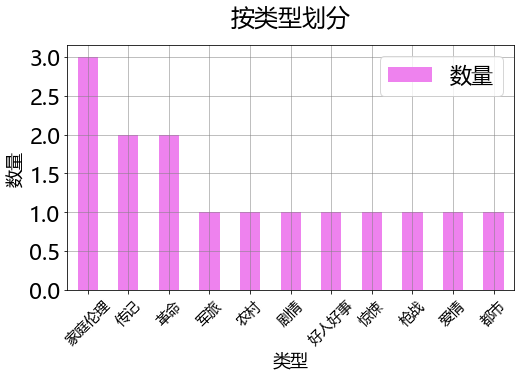

In [ ]:
df_genre_sorted = df.groupby('修正类型')['电影名称'].count().rename(
    '数量').reset_index().sort_values('数量', ascending=False)
df_genre_sorted['数量'] = df_genre_sorted['数量'].astype('int')

plt.clf()
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['axes.facecolor'] = 'white'
ax = df_genre_sorted.plot(
    kind = 'bar',
    grid = True,
    fontsize = 22,
    rot = 0,
    color = ['violet'],
)
ax.set_title("按类型划分",fontsize= 24, pad=20)
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(color='gray', linestyle='-', linewidth=0.5)
ax.set_xlabel('类型',fontsize= 18)
ax.set_xticklabels(df_genre_sorted['修正类型'], fontsize= 14, rotation=45)
ax.set_ylabel("数量",fontsize= 18)
ax.legend(fontsize=22)

fp_plot_genre = path_img + '/df_Releases_zgdypw_genre_{}.png'.format(str_pubdate_latest)
plt.savefig(fp_plot_genre, bbox_inches='tight')

plt.show()

##[7.3] P2 怀胎最久的影片是《荒野召唤1》，从备案到排期公映超过4.4年，名字从《荒野召唤之不忘初心》进化成了《荒野召唤1》。

In [ ]:
P2 = ''
P2 += '怀胎最久的影片是《{}》，'.format(df_view.iloc[0]['电影名称'])
P2 += '从备案到排期公映超过{}年，'.format(df_view.iloc[0]['备案至今'])
P2 += '从获取公映许可到排期上映超过{}个月，'.format(
    round(df_view.iloc[0]['距离公映许可'], 1))
if df_view.iloc[0]['备案名'] != '':
  P2 += '名字从《{}》进化成了《{}》'.format(df_view.iloc[0]['备案名'], df_view.iloc[0]['电影名称'])

record_longest = df_view[df_view['电影名称'] == df_view.iloc[0]['电影名称']]
if record_longest['原备案单位'].iloc[0] != '':
  P2 += '，第一出品方历经了{}'.format('、'.join(record_longest['原备案单位']))
  P2 += '最终由{}接手。'.format(df_view.iloc[0]['第一出品单位'])
P2 += '。'

print(P2)

怀胎最久的影片是《荒野召唤1》，从备案到排期公映超过4.4年，从获取公映许可到排期上映超过22.0个月，名字从《荒野召唤之不忘初心》进化成了《荒野召唤1》。


## [7.4] P3 同样坚守的还有...

In [ ]:
ls_name_3plus_year = df_view.loc[df_view['备案至今']>3, '电影名称'].tolist()[1:]
ls_name_3plus_year = ['《'+ name + '》' for name in ls_name_3plus_year]
P3 = ""
P3 += '坚守了3年以上的影片还有{}。'.format('、'.join(ls_name_3plus_year))

print(P3)

坚守了3年以上的影片还有《东江风云》、《小镇故事多》、《越界》、《演员》、《世上只有妈妈好》、《铁马英歌》。


## [7.5] P4 上市公司相关

In [ ]:
df_view['第一出品单位'].unique()

array(['福建天禾影业有限公司', '广东俞氏伟业影视制作有限公司', '海宁柒久影业有限公司', '四川天府汉唐文化传媒有限公司',
       nan, '巨奔（上海）影业有限公司', '浙江鹰美影业有限公司', '深圳市乐享影业有限公司', '长影集团有限责任公司',
       '北京孔氏兄弟影业有限公司', '龙传龙影视传媒（重庆）有限公司', '大连世润影视制作传播有限公司'], dtype=object)

In [ ]:
# 本批次中与上市影视公司关联的项目有
info_public_film_co = pd.read_csv('/content/drive/MyDrive/Github/Article/reference/info_public_film_co.csv', index_col=0, encoding='utf-8-sig')
ls = info_public_film_co['公司简称'].apply(eval).sum()
pat_public = '|'.join(ls)
pat_public += '|阿里|腾讯|爱奇艺|英皇|寰亚|银都|美亚|大盛|儒意|灿星|横店|博纳|麦颂'
df_focus = df_view.loc[
    df_view['第一出品单位'].fillna('').str.contains(pat_public, regex=True)]
df_focus

,电影名称,pubtitle,pubdate,publink,上映日期,导演,主演,国别/地区,img_remote,备案名,序号,电影类别,编码,公映证号,第一出品单位,公示批次链接,公示名称,公示日期,编剧,梗概,备案公示日期,原备案单位,是否修改,备案立项号,备案至今,类型,年代,预测片名,kw,主要角色,修正类型,距离公映许可


In [ ]:
idx_to_keep = []
df_focus_narrowed = df_focus[df_focus.index.isin(idx_to_keep)]

In [ ]:
df_focus_narrowed

In [ ]:
P4 = ''
P4 += '国产片中，大数据分析识别出{}部上市影视公司关联项目'.format(df_focus.shape[0])
if df_focus.shape[0] > 0:
  P4 += '，占比{}%。'.format(round( (df_focus.shape[0]/(df_view.shape[0]-1)*100), 2 ) )
  P4 += '结合题材与出品方实力，慷田AI聚焦关注《{}》'.format(
      '》、《'.join(df_focus_narrowed['片名']))
  P4 += '，题材类型包括了传记与救灾。'.format(
      '、'.join(df_focus_narrowed.类型.unique()))
P4 += '，两部进口片质量都很不错，具有较大的竞争力。'

print(P4)

国产片中，大数据分析识别出0部上市影视公司关联项目，两部进口片质量都很不错，具有较大的竞争力。


## 热度 [WIP]

In [ ]:
# Update Maoyan Releases - Run only if necessary
path_maoyan = '/content/drive/MyDrive/Github/Content/sources/maoyan'
os.chdir(path_maoyan)

#%load_ext autoreload
%reload_ext autoreload
from maoyan import MAOYAN
maoyan = MAOYAN()

In [ ]:
df_view['电影名称'].to_numpy()

array(['乌海', '我是监护⼈', '世上只有妈妈好', '东江风云', '演员', '信者', '铁马英歌', '荒野召唤1',
       '⾎战狙击岭', '温暖的桥', '小镇故事多', '越界', '入殓师', '007：无暇赴死', '青春作伴好还乡'],
      dtype=object)

##[7.6] P5 按影片展示词云图

In [ ]:
df_label2img

In [ ]:
%%capture
df_view['src_img'] = None
df_view['tgt_img'] = None

In [ ]:
genre_count = df_view.groupby('修正类型')['电影名称'].count(
    ).rename('类型数量').reset_index()
df_view = df_view.merge(genre_count, on='修正类型', how='left')
df_view = df_view.sort_values(['类型数量','上映日期'], ascending=[False, True])
df_view

In [ ]:
P5 = ''
P5 = '\n看图识新片。'

print(P5)


看图识新片。


In [ ]:
df_view['上映日期']

In [ ]:
idx_actor = df_view['主演'].dropna().index

for i in df_view.drop_duplicates('电影名称').index:
  ls = [df_view.loc[i, '电影名称']] * 20
  ls += [df_view.loc[i, '预测片名']] *6
  ls += df_view.loc[i, '主要角色']*3
  if i in idx_actor:
    ls += df_view.loc[i, '主演']*3
  ls += [df_view.loc[i, '修正类型']] *3
  ls += [df_view.loc[i, '年代']]*2
  ls += df_view.loc[i, 'kw']

  if not pd.isna([df_view.loc[i, '第一出品单位']]):
    ls += [df_view.loc[i, '第一出品单位']]
  img_fn = df_view.loc[i, 'src_img']
  if not img_fn:
    img_fn = df_label2img.loc[
        df_label2img['label'] == df_view.loc[i, '修正类型'],
        'fn'
    ].iloc[0]
  txt = '《{}》'.format(df_view.loc[i, '电影名称'])
  txt += "\n上映日期：{}".format(str(df_view.loc[i, '上映日期']).split(' ')[0])
  txt += '\n获得公映许可至今{}个月'.format(df_view.loc[i, '距离公映许可'])
  txt += '，备案至今超过{}年'.format(df_view.loc[i, '备案至今'])

  if df_view.loc[i, '备案名'] != '':
    txt += '\n原备案片名：《{}》'.format(df_view.loc[i, '备案名'])

  txt += '\n编剧：{}'.format(df_view.loc[i, '编剧'])
  #txt += '\n类型：{}'.format(df_view.loc[i, '类型'])

  txt += '\n第一出品单位：{}'.format(df_view.loc[i, '第一出品单位'])
  if df_view.loc[i, '原备案单位'] != '':
    txt +=  '\n原备案单位：{}'.format(df_view.loc[i, '原备案单位'])
  
  print(txt)
  #txt += '{}\n'.format(df_view.loc[i, '梗概'])
  fp_img = path_img + '/genre_icon/{}'.format(img_fn)
  fp_mask = path_img + '/genre_icon/{}'.format('mask_' + img_fn)
  #fp_img = path_img + '/genre_icon/{}'.format('psychedelic-1084082_960_720.jpg')
  fp_generated_img = utils.generate_word_image(ls, 
                                               fp_img, 
                                               fp_mask,
                                               fp_prefix='ZGDYPW_Release_Preview',
                                               fp_suffix=str_pubdate_latest,
                                               img_width=400,
                                               )
  #display(Img(fp_generated_img, width=400))
  df_view.loc[i, 'tgt_img'] = fp_generated_img

In [ ]:
P5 = ''
P5 = '看图了解新片。'

print(P5)

看图了解新片。


## [7.7] 指向电影官网

In [ ]:
#####
E1 = '\n\n'
E1 += ''
E1 += '慷田AI结合自主调研及多方大数据比对，通过分析、建模，提炼关键信息。'
E1 += '备案与公映许可证信息来自中国国家电影局 China Film Administration, 官方网址\n'
E1 += 'http://www.chinafilm.gov.cn/chinafilm 。\n'
E1 += '公映许可证公示信息来自中国电影数据信息网 China Movie Database, 官方网址\n'
E1 += 'https://www.zgdypw.cn/ 。\n'
print(E1)



慷田AI结合自主调研及多方大数据比对，通过分析、建模，提炼关键信息。备案与公映许可证信息来自中国国家电影局 China Film Administration, 官方网址
http://www.chinafilm.gov.cn/chinafilm 。
公映许可证公示信息来自中国电影数据信息网 China Movie Database, 官方网址
https://www.zgdypw.cn/ 。



## [8.9] E2\E3, Pointer Text

In [ ]:
E2 = '点击阅读原文查看本期ContentAI新片预览详表。'
E3 = '点击阅读原文查看本期ContentAI新片预览。'

## [7.8] S0 生成摘要

In [ ]:
S0 = '近期预计上画新片{}部，'.format(df_rel_curr.shape[0])
S0 += '其中国产片{}部、进口片{}部，'.format(
    df_view[df_view['国别/地区'] == '中国'].shape[0],
    df_view[df_view['国别/地区'] != '中国'].shape[0])

n_domestic = df_view['备案立项号'].dropna().str.contains('影剧备字').shape[0]
n_domestic_story = df_view['备案立项号'].dropna().str.contains('影剧备字').sum()
if n_domestic - n_domestic_story > 0:
  S0 += '故事片{}部、'.format(n_domestic_story)
  n_domestic_documentary = \
    df_view['备案立项号'].dropna().str.contains('影纪备字').sum()
  if n_domestic_documentary > 0:
    S0 += '纪录片{}部。'.format(n_domestic_documentary)

S0 += '国产片中，改名的{}部，'.format(df_view.loc[df_view['备案名'] != '',:].shape[0])
S0 += '换主的{}部，'.format(df_view.loc[df_view['原备案单位'] != '',:].shape[0])

S0 += '从获取公映许可到确定排期平均{}个月，'.format(
    round(df_view.iloc[0]['距离公映许可'], 1))
S0 += '从备案到排期平均超过{}年。'.format(df_view.iloc[0]['备案至今'])

S0 += 'ContentAI重点关注《{}》'.format(
    '》、《'.join(df_view.loc[df_view['国别/地区'] != '中国', '电影名称'].to_list())
)

S0 += '、《乌海》。'

print(S0)

近期预计上画新片15部，其中国产片13部、进口片2部，故事片12部、纪录片1部。国产片中，改名的7部，换主的4部，从获取公映许可到确定排期平均3.0个月，从备案到排期平均超过2.4年。ContentAI重点关注《入殓师》、《007：无暇赴死》、《乌海》。


# [5] Output Word Doc

## [5.1] Install Docx Lib

In [ ]:
%%capture
!pip install python-docx
!pip install lxml
from docx import Document
from docx.shared import Inches
from docx.oxml.ns import qn
#from docx.text.parargaph import Paragraph

from docx.shared import Pt

## [5.2] Write Preview to docx and download

In [ ]:
path_doc = '/content/drive/MyDrive/Github/Article/docx'
path_img = '/content/drive/MyDrive/Github/Article/img'

doc = Document()

# Set Document Font 
doc.styles['Normal'].font.name = '微软雅黑'
r = doc.styles['Normal']._element
r.rPr.rFonts.set(qn('w:eastAsia'), '微软雅黑')

# Set Title
doc.core_properties.title = 'ZGDYPW_Release_Preview_' + str_pubdate_latest

doc.add_heading(T1, 0)

p = doc.add_paragraph(S0, style='Intense Quote')

doc.add_paragraph(P1)
doc.add_picture(fp_plot_genre, width =Inches(6))
doc.add_paragraph(P2)
doc.add_paragraph(P3)
doc.add_paragraph(P4)

doc.add_paragraph(P5)
j = 1
for i in df_view.drop_duplicates('电影名称').index:

  txt = '《{}》'.format(df_view.loc[i, '电影名称'])
  txt += "\n上映日期：{}".format(str(df_view.loc[i, '上映日期']).split(' ')[0])
  if df_view.loc[i, '国别/地区'] == '中国':
    if pd.isna(df_view.loc[i, '距离公映许可']):
      txt += '\n已获得公映许可，尚未公示'
    else:
      txt += '\n获得公映许可至今{}个月'.format(df_view.loc[i, '距离公映许可'])
    txt += '，备案至今超过{}年'.format(df_view.loc[i, '备案至今'])

  if df_view.loc[i, '备案名'] != '' and (not pd.isna(df_view.loc[i, '备案名'])):
    txt += '\n原备案片名：《{}》'.format(df_view.loc[i, '备案名'])
  
  txt += '\n导演：{}'.format(df_view.loc[i, '导演'])
  if not pd.isna(df_view.loc[i, '编剧']):
    txt += '\n编剧：{}'.format(df_view.loc[i, '编剧'])
  txt += '\n主演：{}'.format(df_view.loc[i, '主演']) 


  if len(df_view.loc[i, '主要角色']) > 0:
    txt += '\n主要角色：{}'.format('、'.join(df_view.loc[i, '主要角色']))
  txt += '\n类型：{}'.format(df_view.loc[i, '修正类型'])
  txt += '\n国别/地区：{}'.format(df_view.loc[i, '国别/地区'])

  if not pd.isna(df_view.loc[i, '第一出品单位']):
    txt += '\n第一出品单位：{}'.format(df_view.loc[i, '第一出品单位'])
  if (df_view.loc[i, '原备案单位'] != '') and \
    (not pd.isna(df_view.loc[i, '原备案单位'])):
    txt +=  '\n原备案单位：{}'.format(df_view.loc[i, '原备案单位'])

  doc.add_paragraph("[{}]_____________".format(j))
  j += 1
  fp_poster = path_zgdypw+ '/img/' + df_view.loc[i, 'img_remote'].split('/')[-1]
  doc.add_picture(fp_poster, width =Inches(4))
  fp_img = df_view.loc[i, 'tgt_img']
  doc.add_paragraph(txt)
  doc.add_picture(fp_img, width =Inches(4))
  doc.add_paragraph('\n')

doc.add_paragraph(E1)
doc.add_paragraph(E2)

doc.save(path_doc + '/ZGDYPW_Release_Preview_' + str_pubdate_latest +'.docx')

In [ ]:
# Download Document
from google.colab import files

files.download(
    path_doc + '/ZGDYPW_Release_Preview_' + str_pubdate_latest +'.docx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
HTML(df_view[['梗概']].to_html())

## [5.3] Write Table to docx and download

In [180]:
path_doc = '/content/drive/MyDrive/Github/Article/docx'

doc = Document()

# Set Document Font 
doc.styles['Normal'].font.name = '微软雅黑'
r = doc.styles['Normal']._element
r.rPr.rFonts.set(qn('w:eastAsia'), '微软雅黑')

# Set Title
doc.core_properties.title = 'ZGDYPW_Release_s_Table_' + str_pubdate_latest

doc.add_heading('详表：' + T1, 0)

p = doc.add_paragraph(S0, style='Intense Quote')

table = doc.add_table(rows=1, cols=1, style='Light List Accent 4')
j = 1
for i, row in df_view.iterrows():
  row_cells = table.add_row().cells
  row_cells[0].text = '[{}] 《{}》'.format(j ,row['电影名称'])
  j += 1

  # 上映日期
  row_cells = table.add_row().cells
  row_cells[0].text = '上映日期：《{}》'.format(str(row['上映日期']).split(' ')[0]) 

  # 许可至今，备案至今
  if row['国别/地区'] == '中国':
    row_cells = table.add_row().cells
    if pd.isna(row['距离公映许可']):
      row_cells[0].text = '已获得公映许可，尚未公示'
    else:
      row_cells[0].text = '获得公映许可至今{}个月'.format(row['距离公映许可'])
      row_cells[0].text += '，备案至今超过{}年'.format(row['备案至今'])

  # 改名
  if row['备案名'] != '' and (not pd.isna(row['备案名'])):
    row_cells = table.add_row().cells
    row_cells[0].text = '原备案名：《{}》'.format(row['备案名'])

  # 导演
  if row['导演'] != '' and (not pd.isna(row['导演'])):
    row_cells = table.add_row().cells
    row_cells[0].text = '导演：《{}》'.format(row['导演'])
  
  # 编剧
  if not pd.isna(row['编剧']):
    row_cells = table.add_row().cells
    row_cells[0].text = '编剧: ' + row['编剧'] 

  # 主演
  if not pd.isna(row['主演']):
    row_cells = table.add_row().cells
    row_cells[0].text = '主演: ' + row['主演'] 

  # 主要角色
  if len(row['主要角色']) > 0:
    row_cells = table.add_row().cells
    row_cells[0].text = '主要角色：{}'.format('、'.join(row['主要角色']))

  # 类型
  if not pd.isna(row['修正类型']):
    row_cells = table.add_row().cells
    row_cells[0].text = '类型: ' + row['修正类型']

  # 国别/地区
  if not pd.isna(row['国别/地区']):
    row_cells = table.add_row().cells
    row_cells[0].text = '国别/地区: ' + row['国别/地区']

  # 出品方变更
  if not pd.isna(row['第一出品单位']):
    row_cells = table.add_row().cells
    row_cells[0].text ='第一出品单位：{}'.format(row['第一出品单位'])
  if (row['原备案单位'] != '') and (not pd.isna(row['原备案单位'])):
    row_cells = table.add_row().cells
    row_cells[0].text =  '原备案单位：{}'.format(row['原备案单位'])

  #梗概
  row_cells = table.add_row().cells
  row_cells[0].text = row['梗概'].lstrip('\w+')

  row_cells = table.add_row().cells
  row_cells[0].text = ''

doc.add_paragraph(E1)
doc.add_paragraph(E3)

doc.save('/ZGDYPW_Release_Table_' + str_pubdate_latest +'.docx')

In [181]:
files.download('/ZGDYPW_Release_Table_' + str_pubdate_latest +'.docx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>